In [1]:
from matplotlib import pyplot as plt    
from matplotlib import style
import seaborn as sns
style.use('ggplot')
import numpy as np
import pandas as pd

In [2]:
#import data
df = pd.read_csv('B.txt',header=None, delimiter=' ')
df.columns = ['x', 'y']
#change dataframe to numpy arrary
df = df.values

In [3]:
#initalize all the data each point is cluster
def initalize(data):
    classifications={}
    for i in range(len(data)):
        classifications[i+1]=[]
    for i in range(len(data)):
        classifications[i+1].append(list(data[i]))
        
    return classifications


In [4]:
def prox_mat_group(classifications):
    """
    group average algorithm
    """
    size=len(classifications)
    matrix=np.zeros((size,size))
    for row in range(size):
        for col in range(size):
            if row==col:
                similarity = 999999999
            else:
                distance=[np.linalg.norm(ca-cb) for ca in np.array(classifications[row+1]) for cb in np.array(classifications[col+1])]
                #print(classifications)
                similarity=np.mean(distance)
            matrix[row][col]= similarity
            #print(similarity)
    return matrix

In [5]:
def prox_mat_min(classifications):
    """
    min algorithm
    """
    size=len(classifications)
    matrix=np.zeros((size,size))
    for row in range(size):
        for col in range(size):
            if row==col:
                similarity = 999999999
            else:
                distance=[np.linalg.norm(ca-cb) for ca in np.array(classifications[row+1]) for cb in np.array(classifications[col+1])]
                #print(classifications)
                similarity=min(distance)
            matrix[row][col]= similarity
            #print(similarity)
    return matrix    

In [6]:
def prox_mat_max(classifications):
    """
    max algorithm
    """
    size=len(classifications)
    matrix=np.zeros((size,size))
    for row in range(size):
        for col in range(size):
            if row==col:
                similarity = 999999999
            else:
                distance=[np.linalg.norm(ca-cb) for ca in np.array(classifications[row+1]) for cb in np.array(classifications[col+1])]
                similarity=max(distance)
            matrix[row][col]= similarity
    return matrix    

In [35]:
def prox_mat_centroid(classifications):
    """
    centroid algorithm
    """
    size=len(classifications)
    matrix=np.zeros((size,size))
    for row in range(size):
        for col in range(size):
            if row==col:
                similarity = 999999999
            else:
                centroid1=np.average(classifications[row+1],axis=0)
                centroid2=np.average(classifications[col+1],axis=0)
                #print(centroid1,centroid2)
                similarity=np.linalg.norm(centroid1-centroid2)
                #print(similarity)
            matrix[row][col]= similarity
    return matrix

In [36]:
def combine(classifications, mat):
    #find min in proximity matrix
    combine=np.unravel_index(mat.argmin(), mat.shape)
    #find classification number we need to combine
    combineA=combine[0]+1
    combineB=combine[1]+1
    if combineB> combineA:
        temp = combineA
        combineA = combineB
        combineB = temp
    # combineA > combineB:
    classifications[combineB].extend(classifications[combineA])
    classifications.pop(combineA)
    flag=1
    for key,value in list(classifications.items()):
        if key!= flag:
            classifications[flag]= classifications.pop(key)
        flag=flag+1
    return classifications

In [9]:
def hier_cls(data):
    classifications=initalize(data)
    #matrix=prox_mat_group(classifications)
    while True:
        
        classifications = combine(classifications, prox_mat_group(classifications))
        #print(classifications)

        if len(classifications)==2:
            return classifications
            break

In [10]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3]])

In [11]:
cls_group=hier_cls(df)
print(cls_group)

{1: [[1.4629000000000001, 1.7974000000000001], [1.4371, 1.7932999999999999], [1.4919, 1.7237], [1.4855, 1.7523], [1.4468000000000001, 1.7155], [1.4274, 1.7278], [1.4984, 1.5395000000000001], [1.5435000000000001, 1.5354000000000001], [1.4597, 1.6335999999999999], [1.4790000000000001, 1.5968], [1.5145, 1.6132], [1.5274000000000001, 1.6254], [1.3855, 1.8629], [1.4113, 1.8547], [1.3468, 1.7809999999999999], [1.3661000000000001, 1.8015000000000001], [1.3048, 1.8956], [1.3081, 1.8996999999999999], [1.3358000000000001, 1.8501000000000001], [1.2305999999999999, 1.8915], [1.1919, 1.8711], [1.2467999999999999, 1.8219000000000001], [1.4919, 1.1095999999999999], [1.4919, 1.1588000000000001], [1.5113000000000001, 1.2038], [1.5081, 1.212], [1.4758, 1.212], [1.5177, 1.3266], [1.5242, 1.3348], [1.5145, 1.3552999999999999], [1.5274000000000001, 1.4699], [1.5370999999999999, 1.4208000000000001], [1.4886999999999999, 1.4003000000000001], [0.80810000000000004, 1.9160999999999999], [0.79520000000000002, 1.

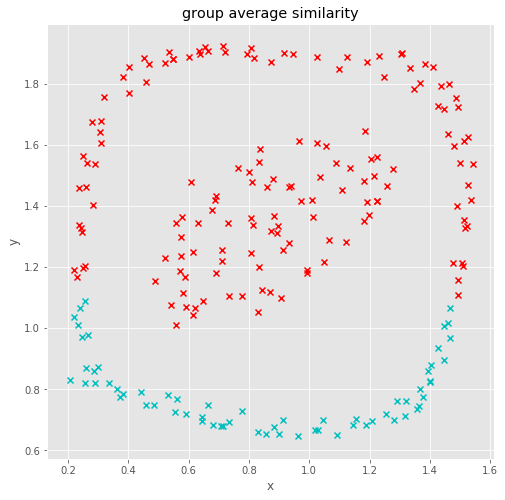

In [12]:
colors = 10*["g","r","c","b","k"]
plt.figure(figsize=(8,8))
for classification in cls_group:
    color = colors[classification]
    for featureset in cls_group[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, linewidths=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('group average similarity')
plt.show()

In [13]:
def hier_cls2(data):
    classifications=initalize(data)
    #matrix=prox_mat_group(classifications)
    while True:
        
        classifications = combine(classifications, prox_mat_min(classifications))
        #print(classifications)

        if len(classifications)==2:
            return classifications
            break

In [14]:
cls_min=hier_cls2(df)
print(cls_min)

{1: [[1.4629000000000001, 1.7974000000000001], [1.4371, 1.7932999999999999], [1.4919, 1.7237], [1.4855, 1.7523], [1.4468000000000001, 1.7155], [1.4274, 1.7278], [1.3855, 1.8629], [1.4113, 1.8547], [1.3358000000000001, 1.8501000000000001], [1.3048, 1.8956], [1.3081, 1.8996999999999999], [1.3468, 1.7809999999999999], [1.3661000000000001, 1.8015000000000001], [1.0984, 1.8465], [1.1242000000000001, 1.8874], [1.2305999999999999, 1.8915], [1.1919, 1.8711], [1.2467999999999999, 1.8219000000000001], [1.4984, 1.5395000000000001], [1.5435000000000001, 1.5354000000000001], [1.4597, 1.6335999999999999], [1.5145, 1.6132], [1.5274000000000001, 1.6254], [1.4790000000000001, 1.5968], [1.5177, 1.3266], [1.5242, 1.3348], [1.5145, 1.3552999999999999], [1.4886999999999999, 1.4003000000000001], [1.5274000000000001, 1.4699], [1.5370999999999999, 1.4208000000000001], [0.80810000000000004, 1.9160999999999999], [0.79520000000000002, 1.8956], [0.81769999999999998, 1.8833], [0.91769999999999996, 1.89969999999999

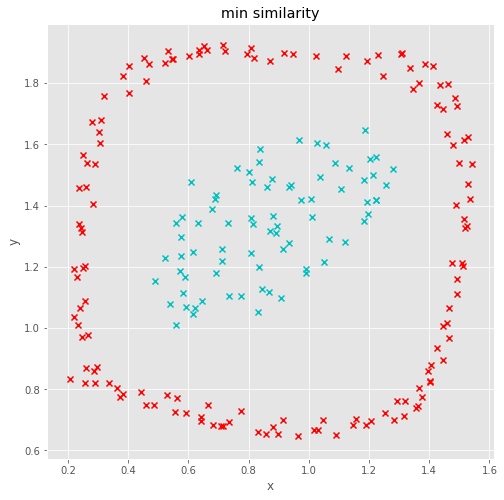

In [15]:
plt.figure(figsize=(8,8))
for classification in cls_min:
    color = colors[classification]
    for featureset in cls_min[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, linewidths=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('min similarity')

plt.show()

In [16]:
def hier_cls3(data):
    classifications=initalize(data)
    while True:        
        classifications = combine(classifications, prox_mat_max(classifications))
        if len(classifications)==2:
            return classifications
            break

In [17]:
cls_max=hier_cls3(df)
print(cls_max)

{1: [[1.4629000000000001, 1.7974000000000001], [1.4371, 1.7932999999999999], [1.4919, 1.7237], [1.4855, 1.7523], [1.4468000000000001, 1.7155], [1.4274, 1.7278], [1.4597, 1.6335999999999999], [1.4790000000000001, 1.5968], [1.5145, 1.6132], [1.5274000000000001, 1.6254], [1.4984, 1.5395000000000001], [1.5435000000000001, 1.5354000000000001], [1.5274000000000001, 1.4699], [1.5370999999999999, 1.4208000000000001], [1.5177, 1.3266], [1.5242, 1.3348], [1.5145, 1.3552999999999999], [1.4886999999999999, 1.4003000000000001], [1.3855, 1.8629], [1.4113, 1.8547], [1.3468, 1.7809999999999999], [1.3661000000000001, 1.8015000000000001], [1.3048, 1.8956], [1.3081, 1.8996999999999999], [1.3358000000000001, 1.8501000000000001], [1.2305999999999999, 1.8915], [1.1919, 1.8711], [1.2467999999999999, 1.8219000000000001], [1.0984, 1.8465], [1.1242000000000001, 1.8874], [1.0242, 1.8874], [1.4016, 0.82310000000000005], [1.4016, 0.82720000000000005], [1.4048, 0.88039999999999996], [1.3952, 0.8599], [1.4274, 0.933

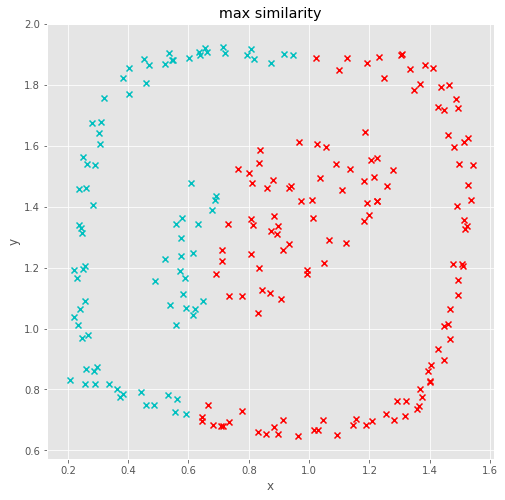

In [18]:
plt.figure(figsize=(8,8))
for classification in cls_max:
    color = colors[classification]
    for featureset in cls_max[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, linewidths=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('max similarity')

plt.show()

In [37]:
def hier_cls4(data):
    classifications=initalize(data)
    while True:
        classifications = combine(classifications, prox_mat_centroid(classifications))
        if len(classifications)==2:
            #print(prox_mat_centroid(classifications))
            return classifications
            break

In [38]:
cls_centroid=hier_cls4(df)
print(cls_centroid)

{1: [[1.4629000000000001, 1.7974000000000001], [1.4371, 1.7932999999999999], [1.4919, 1.7237], [1.4855, 1.7523], [1.4468000000000001, 1.7155], [1.4274, 1.7278], [1.4984, 1.5395000000000001], [1.5435000000000001, 1.5354000000000001], [1.4597, 1.6335999999999999], [1.4790000000000001, 1.5968], [1.5145, 1.6132], [1.5274000000000001, 1.6254], [1.3855, 1.8629], [1.4113, 1.8547], [1.3468, 1.7809999999999999], [1.3661000000000001, 1.8015000000000001], [1.3048, 1.8956], [1.3081, 1.8996999999999999], [1.3358000000000001, 1.8501000000000001], [1.2305999999999999, 1.8915], [1.1919, 1.8711], [1.2467999999999999, 1.8219000000000001], [1.0113000000000001, 1.3634999999999999], [0.97260000000000002, 1.4167000000000001], [1.0081, 1.4208000000000001], [1.0370999999999999, 1.4944], [1.1338999999999999, 1.5230999999999999], [1.0887, 1.5395000000000001], [1.1081000000000001, 1.4535], [1.0565, 1.5968], [1.0274000000000001, 1.605], [0.96609999999999996, 1.6132], [1.2242, 1.4167000000000001], [1.2242, 1.41670

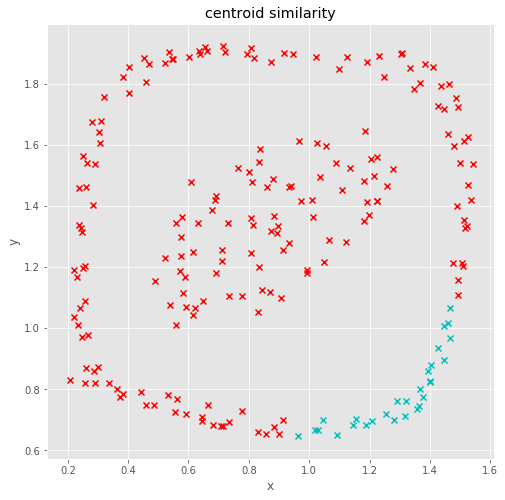

In [39]:
plt.figure(figsize=(8,8))
for classification in cls_centroid:
    color = colors[classification]
    for featureset in cls_centroid[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, linewidths=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('centroid similarity')
plt.show()